In [6]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
from pycbc.detector import Detector
from pycbc.filter import matched_filter, resample_to_delta_t, highpass
from pycbc.waveform import get_td_waveform, taper_timeseries
from pycbc.psd import interpolate, inverse_spectrum_truncation
import numpy

peak of signal_h1:  4.711594384072505e-22
peak occurs at:  -0.00538041825000013
length of signal_h1:  13300
min of signal_h1:  -4.891095681129915e-22


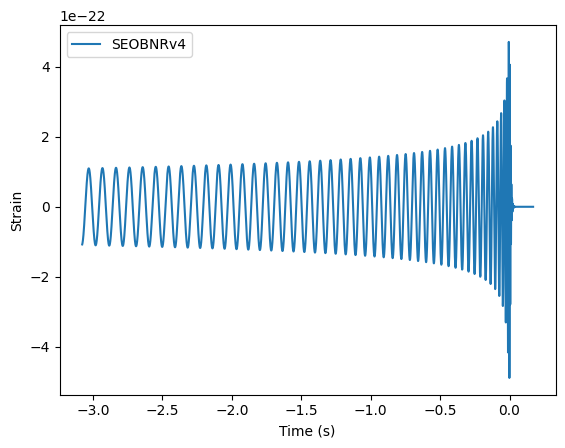

In [12]:
apx = "SEOBNRv4"
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(
    approximant=apx, mass1=33, mass2=57, delta_t=1.0 / 4096, f_lower=10, distance=2000
)

det_h1 = Detector("H1")


signal_h1 = hp

pp.plot(signal_h1.sample_times, signal_h1, label=apx)


pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.legend()

print("peak of signal_h1: ", max(signal_h1))
print(
    "peak occurs at: ", signal_h1.sample_times[numpy.argmax(signal_h1)]
)  # 1192529719.998291
print("length of signal_h1: ", len(signal_h1))
print("min of signal_h1: ", min(signal_h1))

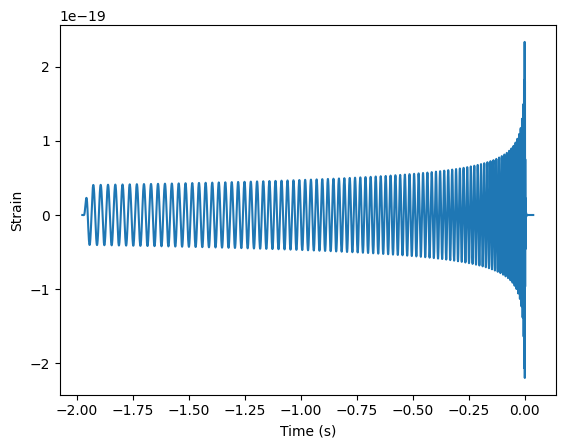

In [8]:
signal_h1_tapered = taper_timeseries(signal_h1, tapermethod="TAPER_START")
pp.plot(signal_h1_tapered.sample_times, signal_h1_tapered, label=apx)
pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.show()

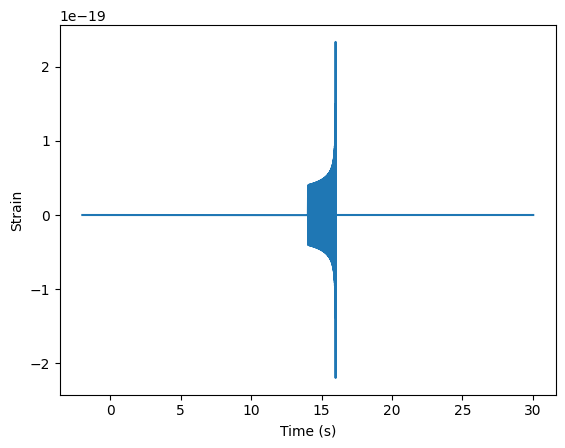

In [9]:
signal_h1_tapered.resize(131072)
signal_h1_shifted = numpy.roll(signal_h1_tapered, len(signal_h1_tapered) // 2)
pp.plot(signal_h1_tapered.sample_times, signal_h1_shifted, label=apx)
pp.ylabel("Strain")
pp.xlabel("Time (s)")
pp.show()